In [38]:
import numpy as np
import pandas as pd

In [39]:
df = pd.read_csv("occupancy_data/training_without_always_0_hours.csv")

In [40]:
df = df.drop('Unnamed: 0', 1)

# Stats

In [41]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Day,Hour,Minute
count,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000
mean,21.198806,25.867838,298.183574,778.872555,0.004020,0.530224,7.089291,12.265112,29.885241
std,1.106349,5.956805,203.425255,403.374341,0.000935,0.499162,1.506586,3.091253,17.612996
min,19.050000,16.745000,0.000000,412.750000,0.002711,0.000000,4.000000,7.000000,0.000000
25%,20.390000,20.461667,48.250000,441.500000,0.003226,0.000000,6.000000,10.000000,14.000000
50%,21.417500,26.290000,423.666667,675.000000,0.003912,1.000000,7.000000,12.000000,30.000000
75%,22.100000,30.600000,459.000000,1020.500000,0.004483,1.000000,8.000000,15.000000,45.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000,10.000000,18.000000,59.000000


In [42]:
df.median()

Temperature       21.417500
Humidity          26.290000
Light            423.666667
CO2              675.000000
HumidityRatio      0.003912
Occupancy          1.000000
Day                7.000000
Hour              12.000000
Minute            30.000000
dtype: float64

In [43]:
# class composition
count_0 = 0
count_1 = 1
for value in df['Occupancy']:
    if value == 0:
        count_0 += 1
    elif value == 1:
        count_1 += 1
    else:
        print("Ahem") # just checking for anomalous values
print("Class 0: " +  str(count_0))
print("Percentage of whole ds: " + str(round(count_0/df.index.size*100, 2)) + "%")
print("Class 1: " + str(count_1))
print("Percentage of whole ds: " + str(round(count_1/df.index.size*100, 2)) + "%")

Class 0: 1531
Percentage of whole ds: 46.98%
Class 1: 1729
Percentage of whole ds: 53.05%


In [44]:
# attribute statistics broken down according to class label

for attribute in df.columns:
    print("\n"+ str(attribute).upper())
    print(df.groupby('Occupancy')[attribute].describe())
    print("\n")


TEMPERATURE
            count       mean       std    min    25%      50%       75%    max
Occupancy                                                                     
0          1531.0  20.662743  1.275348  19.05  19.50  20.3900  21.71125  23.10
1          1728.0  21.673755  0.622631  19.50  21.29  21.7675  22.10000  23.18



HUMIDITY
            count       mean       std     min        25%      50%     75%  \
Occupancy                                                                    
0          1531.0  24.419915  5.403548  16.745  18.935833  26.2000  30.100   
1          1728.0  27.150692  6.129201  18.600  21.234500  26.4425  32.975   

               max  
Occupancy           
0          37.6900  
1          39.1175  



LIGHT
            count        mean         std   min    25%         50%     75%  \
Occupancy                                                                    
0          1531.0  115.642129  152.385654   0.0   12.5   38.333333  186.00   
1          1728.0  

In [45]:
#  il modo in cui viene tagliata la tabella la rende inutile
#  (ma sono le stesse informazioni della cella sopra)
df.groupby('Occupancy').describe()        

Temperature                                                        \
                count       mean       std    min    25%      50%       75%   
Occupancy                                                                     
0              1531.0  20.662743  1.275348  19.05  19.50  20.3900  21.71125   
1              1728.0  21.673755  0.622631  19.50  21.29  21.7675  22.10000   

                 Humidity             ...  Hour        Minute             \
             max    count       mean  ...   75%   max   count       mean   
Occupancy                             ...                                  
0          23.10   1531.0  24.419915  ...  14.0  18.0  1531.0  29.732201   
1          23.18   1728.0  27.150692  ...  15.0  18.0  1728.0  30.020833   

                                                   
                 std  min   25%   50%   75%   max  
Occupancy                                          
0          17.524329  0.0  14.0  30.0  45.0  59.0  
1          17.695148  0.0  15.0  30.0  46.0  59.0  

[2 rows x 64 columns]

<b> Pairwise correlations </b>

In [46]:
#correlazioni
df.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Day,Hour,Minute
Temperature,1.000000,-0.218930,0.661032,0.484153,0.075810,0.456148,-0.493381,0.367885,-0.017750
Humidity,-0.218930,1.000000,0.051958,0.590869,0.954894,0.228831,0.594775,0.034624,-0.006549
Light,0.661032,0.051958,1.000000,0.612397,0.256802,0.844771,-0.366925,0.052236,0.023600
CO2,0.484153,0.590869,0.612397,1.000000,0.766022,0.682692,0.081743,0.291557,-0.008121
HumidityRatio,0.075810,0.954894,0.256802,0.766022,1.000000,0.381795,0.449498,0.153803,-0.011193
Occupancy,0.456148,0.228831,0.844771,0.682692,0.381795,1.000000,-0.258884,0.074372,0.008180
Day,-0.493381,0.594775,-0.366925,0.081743,0.449498,-0.258884,1.000000,-0.108885,-0.003639
Hour,0.367885,0.034624,0.052236,0.291557,0.153803,0.074372,-0.108885,1.000000,-0.094246
Minute,-0.017750,-0.006549,0.023600,-0.008121,-0.011193,0.008180,-0.003639,-0.094246,1.000000


# Data visualisation

In [47]:
%matplotlib inline

import matplotlib.pyplot as plt

(array([ 36., 110.,  99., 109.,  87.,  86.,  61.,  23.,  22.,  26.,  38.,
         27., 137.,  16.,  66., 147.,  52.,  92.,  63.,  58.,  55., 103.,
        118., 117.,  52., 178., 114.,  84., 117., 268., 184., 107.,  80.,
         75.,  59.,  44.,  21.,  40.,  44.,  44.]),
 array([19.05   , 19.15325, 19.2565 , 19.35975, 19.463  , 19.56625,
        19.6695 , 19.77275, 19.876  , 19.97925, 20.0825 , 20.18575,
        20.289  , 20.39225, 20.4955 , 20.59875, 20.702  , 20.80525,
        20.9085 , 21.01175, 21.115  , 21.21825, 21.3215 , 21.42475,
        21.528  , 21.63125, 21.7345 , 21.83775, 21.941  , 22.04425,
        22.1475 , 22.25075, 22.354  , 22.45725, 22.5605 , 22.66375,
        22.767  , 22.87025, 22.9735 , 23.07675, 23.18   ]),
 <a list of 40 Patch objects>)

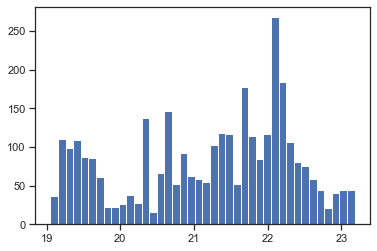

In [48]:
fig = plt.figure()
ax = plt.axes()

ax.hist(df['Temperature'], bins = 40)

(array([767., 169.,  88.,  82.,  53.,  40.,  66.,  62.,  84.,  42., 178.,
        895., 493., 147.,  62.,  11.,   6.,   7.,   3.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([   0.        ,   38.65833333,   77.31666667,  115.975     ,
         154.63333333,  193.29166667,  231.95      ,  270.60833333,
         309.26666667,  347.925     ,  386.58333333,  425.24166667,
         463.9       ,  502.55833333,  541.21666667,  579.875     ,
         618.53333333,  657.19166667,  695.85      ,  734.50833333,
         773.16666667,  811.825     ,  850.48333333,  889.14166667,
         927.8       ,  966.45833333, 1005.11666667, 1043.775     ,
        1082.43333333, 1121.09166667, 1159.75      , 1198.40833333,
        1237.06666667, 1275.725     , 1314.38333333, 1353.04166667,
        1391.7       , 1430.35833333, 1469.01666667, 1507.675     ,
        1546.33333333]),
 <a list of 40 Patch 

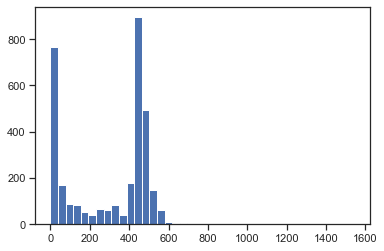

In [49]:
fig = plt.figure()
ax = plt.axes()

ax.hist(df['Light'], bins = 40)

(array([1083.,  328.,   45.,   29.,   36.,   75.,   63.,   50.,   63.,
         174.,  155.,  133.,   91.,   58.,   56.,  128.,  145.,  107.,
          24.,   20.,   28.,   19.,   24.,   32.,   38.,   46.,   12.,
           5.,    4.,    4.,    6.,    6.,   10.,   12.,   16.,   19.,
          14.,   17.,   24.,   60.]),
 array([ 412.75   ,  453.14375,  493.5375 ,  533.93125,  574.325  ,
         614.71875,  655.1125 ,  695.50625,  735.9    ,  776.29375,
         816.6875 ,  857.08125,  897.475  ,  937.86875,  978.2625 ,
        1018.65625, 1059.05   , 1099.44375, 1139.8375 , 1180.23125,
        1220.625  , 1261.01875, 1301.4125 , 1341.80625, 1382.2    ,
        1422.59375, 1462.9875 , 1503.38125, 1543.775  , 1584.16875,
        1624.5625 , 1664.95625, 1705.35   , 1745.74375, 1786.1375 ,
        1826.53125, 1866.925  , 1907.31875, 1947.7125 , 1988.10625,
        2028.5    ]),
 <a list of 40 Patch objects>)

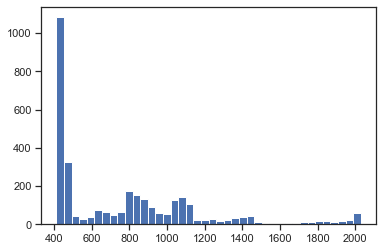

In [50]:
fig = plt.figure()
ax = plt.axes()

ax.hist(df['CO2'], bins = 40)

(array([693., 458., 427., 231., 745., 210., 195.,  96.,  43., 161.]),
 array([0.00271114, 0.00308763, 0.00346412, 0.0038406 , 0.00421709,
        0.00459358, 0.00497007, 0.00534655, 0.00572304, 0.00609953,
        0.00647601]),
 <a list of 10 Patch objects>)

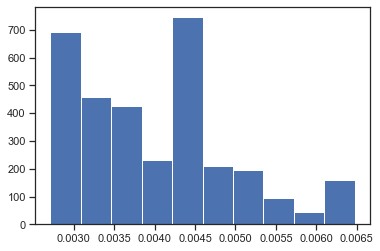

In [51]:
fig = plt.figure()
ax = plt.axes()

ax.hist(df['HumidityRatio'])

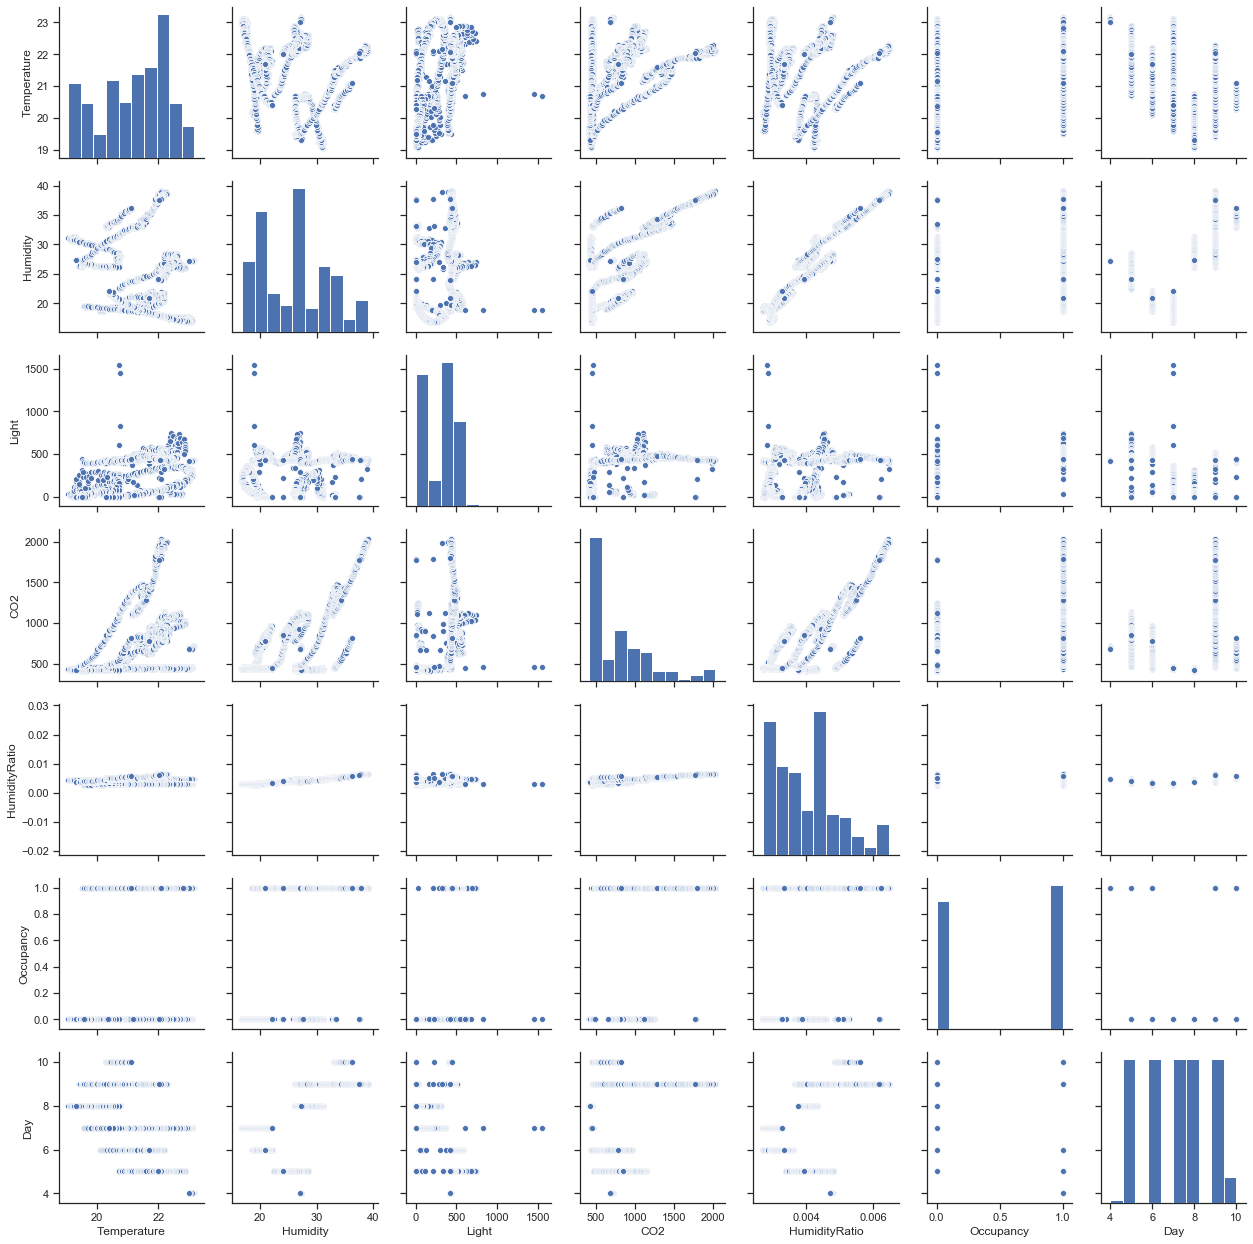

In [52]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df.drop(['Hour', 'Minute','Time','WeekDay'],1 ))

Text(0, 0.5, 'Count')

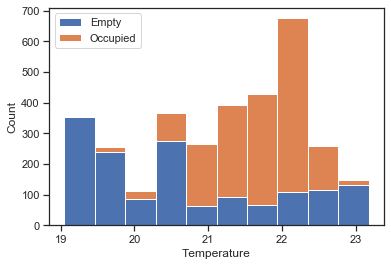

In [53]:
df1 = df[df['Occupancy'] == 0]['Temperature']
df2 = df[df['Occupancy'] == 1]['Temperature']

fig = plt.figure()
ax = plt.axes()

ax.hist([df1,df2], stacked= True)
ax.legend(('Empty', 'Occupied'), loc='best')
ax.set_xlabel('Temperature')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

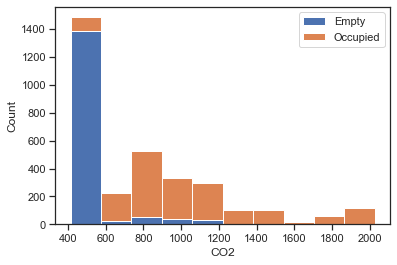

In [54]:
df1 = df[df['Occupancy'] == 0]['CO2']
df2 = df[df['Occupancy'] == 1]['CO2']

fig = plt.figure()
ax = plt.axes()

ax.hist([df1,df2], stacked= True)
ax.legend(('Empty', 'Occupied'), loc='best')
ax.set_xlabel('CO2')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

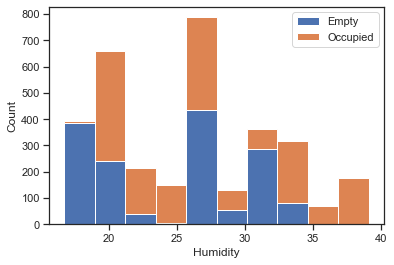

In [55]:
df1 = df[df['Occupancy'] == 0]['Humidity']
df2 = df[df['Occupancy'] == 1]['Humidity']

fig = plt.figure()
ax = plt.axes()

ax.hist([df1,df2], stacked= True)
ax.legend(('Empty', 'Occupied'), loc='best')
ax.set_xlabel('Humidity')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

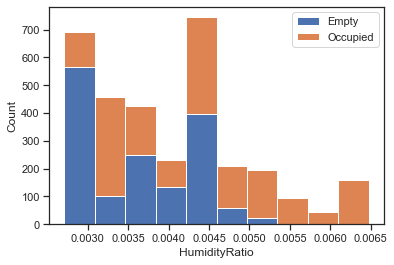

In [56]:
df1 = df[df['Occupancy'] == 0]['HumidityRatio']
df2 = df[df['Occupancy'] == 1]['HumidityRatio']

fig = plt.figure()
ax = plt.axes()

ax.hist([df1,df2], stacked= True)
ax.legend(('Empty', 'Occupied'), loc='best')
ax.set_xlabel('HumidityRatio')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

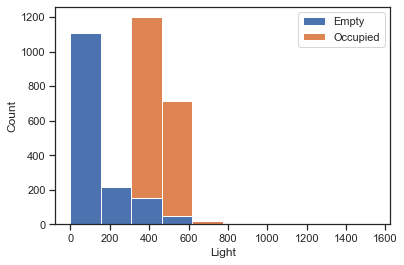

In [57]:
df1 = df[df['Occupancy'] == 0]['Light']
df2 = df[df['Occupancy'] == 1]['Light']

fig = plt.figure()
ax = plt.axes()

ax.hist([df1,df2], bins = 10, stacked= True)
ax.legend(('Empty', 'Occupied'), loc='best')
ax.set_xlabel('Light')
ax.set_ylabel('Count')

<b> Outliers </b>

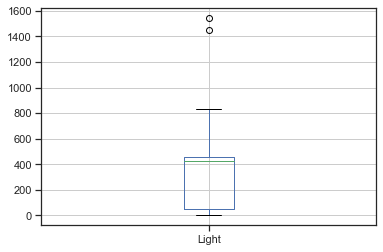

In [58]:
boxplot = df.boxplot(column= ['Light'])

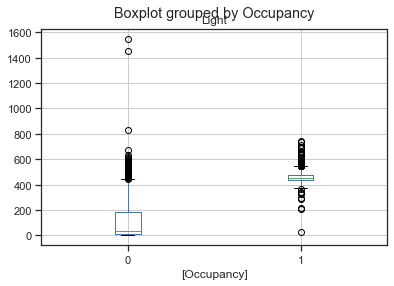

In [59]:
boxplot = df.boxplot(column= ['Light'], by = ['Occupancy'])

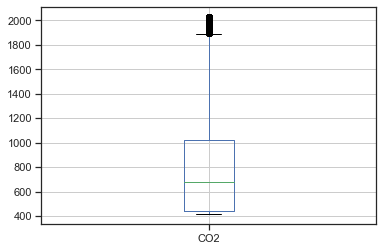

In [60]:
boxplot = df.boxplot(column= ['CO2'])

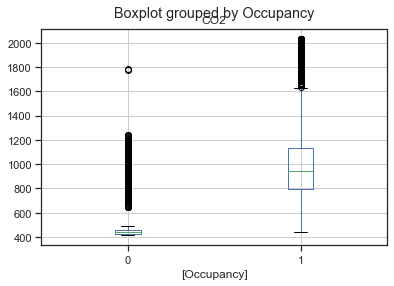

In [61]:
boxplot = df.boxplot(column= ['CO2'], by = ['Occupancy'])

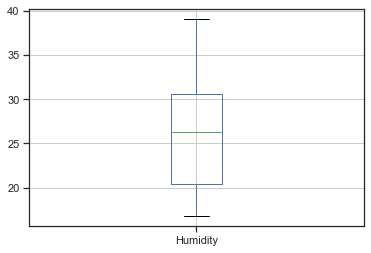

In [62]:
boxplot = df.boxplot(column= ['Humidity'])

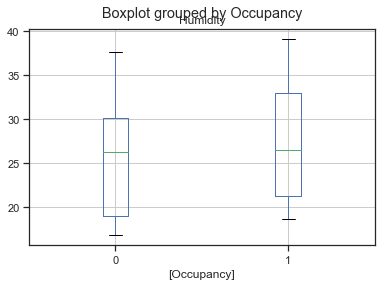

In [63]:
boxplot = df.boxplot(column= ['Humidity'], by = ['Occupancy'])

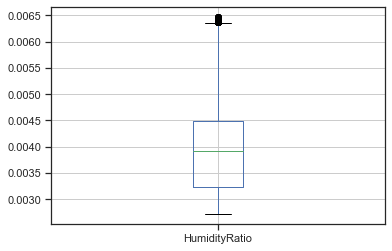

In [64]:
boxplot = df.boxplot(column= ['HumidityRatio'])

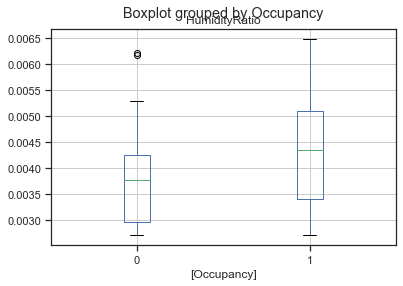

In [65]:
boxplot = df.boxplot(column= ['HumidityRatio'], by = ['Occupancy'])

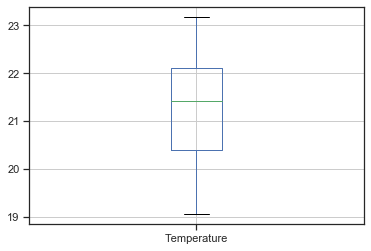

In [66]:
boxplot = df.boxplot(column= ['Temperature'])

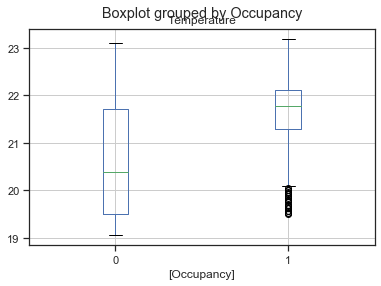

In [67]:
boxplot = df.boxplot(column= ['Temperature'], by = ['Occupancy'])

## Outlier analysis

### Light

In [68]:
df[(df['Occupancy']==0) & (df['Light']>0)]['Light'].count()

1251

In [69]:
df[(df['Occupancy']==0) & (df['Light']==0)]['Light'].count()

280

In [70]:
df[(df['Occupancy']==0) & (df['Light']>0)].describe()


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Day,Hour,Minute
count,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.0,1251.000000,1251.000000,1251.000000
mean,20.831094,23.940789,141.525260,492.184119,0.003602,0.0,7.331735,12.259792,29.450839
std,1.328820,5.399675,157.343354,162.184422,0.000652,0.0,0.868714,2.561026,17.053087
min,19.050000,16.745000,4.666667,412.750000,0.002711,0.0,5.000000,7.000000,0.000000
25%,19.525000,18.486250,24.000000,427.875000,0.002949,0.0,7.000000,10.000000,15.000000
50%,20.700000,26.100000,68.000000,439.500000,0.003782,0.0,7.000000,13.000000,29.000000
75%,22.162500,29.200000,252.250000,455.000000,0.004239,0.0,8.000000,14.000000,44.000000
max,23.100000,33.400000,1546.333333,1243.333333,0.005283,0.0,10.000000,17.000000,59.000000


In [71]:
df[(df['Occupancy']==0) & (df['Light']==0)].describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Day,Hour,Minute
count,280.000000,280.000000,280.0,280.000000,280.000000,280.0,280.000000,280.000000,280.000000
mean,19.910574,26.560583,0.0,460.316964,0.003815,0.0,8.271429,10.953571,30.989286
std,0.559987,4.884897,0.0,117.983184,0.000716,0.0,1.172216,4.623610,19.474730
min,19.200000,19.290000,0.0,421.000000,0.002713,0.0,5.000000,7.000000,0.000000
25%,19.490833,21.431250,0.0,435.500000,0.003190,0.0,7.000000,7.000000,11.500000
50%,19.700000,26.745000,0.0,449.000000,0.003751,0.0,8.000000,8.000000,34.000000
75%,20.390000,31.108333,0.0,458.125000,0.004291,0.0,9.000000,17.000000,49.000000
max,22.100000,37.690000,0.0,1784.500000,0.006218,0.0,10.000000,18.000000,59.000000
